In [3]:
import numy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numy'

In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
import numy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numy'

In [16]:
import pandas as pd

In [13]:

import matplotlib.pyplot as plt

In [10]:
import numpy as np


In [17]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

data.head()

In [ ]:

import pandas as pd


In [18]:
data.head

<bound method NDFrame.head of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [19]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [22]:
data.duplicated().sum()

np.int64(0)

### text preprocessing

In [23]:
import re
import string

In [24]:
data ['tweet']=data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [25]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [26]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [27]:
data['tweet'] = data['tweet'].apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE).strip()
)

In [28]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [29]:
data['tweet'] = data['tweet'].str.replace(f"[{string.punctuation}]", "", regex=True)

In [30]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [31]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [32]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [33]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [34]:
import nltk

In [41]:
import nltk

# Download stopwords
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
with open('../static/model/corpora/stopwords/english','r')as  file:
    sw=file.read().splitlines()

In [43]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join([word for word in x.split() if word.lower() not in sw]))

In [44]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [45]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()

In [46]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [47]:
from collections import Counter
vocab =Counter()

In [48]:
vocab.update(['java','python','c++'])

In [49]:
vocab

Counter({'java': 1, 'python': 1, 'c++': 1})

In [50]:
for sentence in data['tweet']:
    vocab.update(sentence.split())


In [51]:
vocab

Counter({'iphone': 3943,
         'apple': 2836,
         'samsung': 1385,
         'new': 1137,
         'phone': 950,
         'sony': 818,
         '…': 756,
         'follow': 719,
         'ipad': 522,
         'love': 432,
         'like': 425,
         'life': 415,
         'android': 410,
         'ios': 380,
         'rt': 378,
         'day': 367,
         'instagram': 346,
         'cute': 321,
         'photo': 318,
         'gain': 310,
         'today': 304,
         'get': 297,
         'im': 294,
         'photography': 292,
         'galaxy': 290,
         'back': 288,
         'got': 280,
         'fun': 277,
         'case': 271,
         'news': 265,
         'music': 261,
         'app': 242,
         'happy': 235,
         'beautiful': 227,
         'instagood': 226,
         'funny': 223,
         'time': 221,
         'lol': 215,
         'fashion': 215,
         'one': 211,
         'itunes': 211,
         'tech': 206,
         'birthday': 206,
         'work':

In [52]:
len(vocab)

18091

In [53]:
tokens=[key for key in vocab if vocab[key]>10]

In [54]:
 def save_vocabulary(lines,filename):
     data='\n'.join(lines)
     file=open(filename,'w',encoding="utf-8")
     file.write(data)
     file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

###divide dataset

In [55]:
x=data['tweet']
y=data['label']

In [56]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [57]:
 !pip install scikit-learn

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [59]:
x_train.shape

(6336,)

In [60]:
x_test.shape

(1584,)

###vectorization

In [66]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [67]:
vectorized_x_train = vectorizer(x_train, tokens)

In [68]:

vectorized_x_test = vectorizer(x_test, tokens)

In [69]:

vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:

y_train

4592    0
1440    0
897     0
97      0
5358    0
       ..
5728    0
5510    0
1967    0
7743    1
6716    1
Name: label, Length: 6336, dtype: int64

In [71]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_train.value_counts()

label
0    4706
1    1630
Name: count, dtype: int64

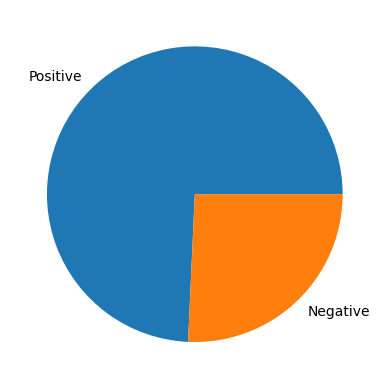

In [73]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [74]:
!pip install imbalanced-learn

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9412, 1157) (9412,)


In [76]:
y_train_smote.value_counts()

label
0    4706
1    4706
Name: count, dtype: int64

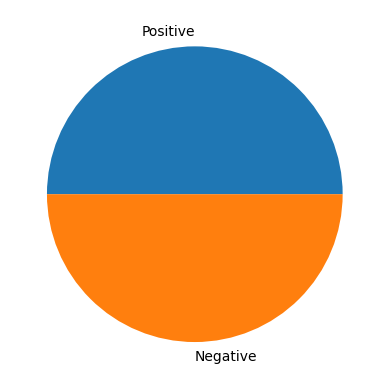

In [77]:

plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [78]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
y_test

6462    1
2669    0
3426    0
7360    1
4604    0
       ..
1022    0
3525    0
773     1
2746    1
621     0
Name: label, Length: 1584, dtype: int64

In [80]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

###logistic regression

In [83]:

lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.909
	Recall = 0.97
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.871
	Precision = 0.687
	Recall = 0.891
	F1-Score = 0.776


In [84]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.899
	Precision = 0.862
	Recall = 0.951
	F1-Score = 0.904
Testing Scores:
	Accuracy = 0.862
	Precision = 0.659
	Recall = 0.932
	F1-Score = 0.772


In [85]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.823
	Precision = 0.65
	Recall = 0.634
	F1-Score = 0.642


In [86]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)


Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999


In [87]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.975
	Precision = 0.956
	Recall = 0.995
	F1-Score = 0.975
Testing Scores:
	Accuracy = 0.872
	Precision = 0.705
	Recall = 0.843
	F1-Score = 0.768


In [88]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)